In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 25 15:51:49 2022

@author: danma
"""


'\nCreated on Fri Mar 25 15:51:49 2022\n\n@author: danma\n'

In [2]:
#%% Step 1 Imports data into pandas dataframe
import pandas as pa

df = pa.read_table('C:/Users/danma/Documents/STA 4365/midterm/parkinsons.data', sep=',')
print(df.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [3]:
#%% Step 2 splits data into x and y

x = df.drop(['status', 'name'], axis=1)
y = df.iloc[:, 17]

#turns y into a 1-d array instead of a dataframe column
y = y.to_numpy()
y = y.ravel()
y = y.astype('int')

In [4]:
#%% Step 3 Prepare data by standardizing each feature to have mean 0 and variance 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x[list(x.columns)] = scaler.fit_transform(x[list(x.columns)])

print(x.head())

del scaler

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0     0.184308      0.112592      0.054815        0.195680          0.249012   
1     0.198327      0.094930      0.278323        0.254130          0.288538   
2     0.165039      0.059128      0.265288        0.280178          0.328063   
3     0.165004      0.072927      0.264200        0.263342          0.328063   
4     0.161150      0.080909      0.260107        0.354511          0.407115   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.145472  0.247588    0.145288      0.312215          0.280197  ...   
1  0.191233  0.323687    0.191042      0.472887          0.444536  ...   
2  0.229287  0.369239    0.229411      0.390634          0.326212  ...   
3  0.209056  0.324759    0.208862      0.414278          0.354971  ...   
4  0.282755  0.437299    0.282870      0.499452          0.410025  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1

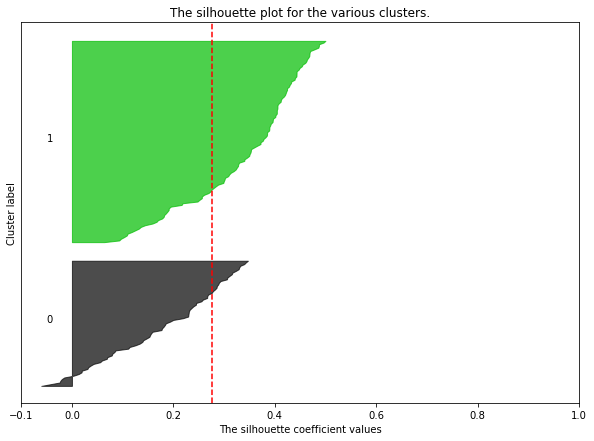

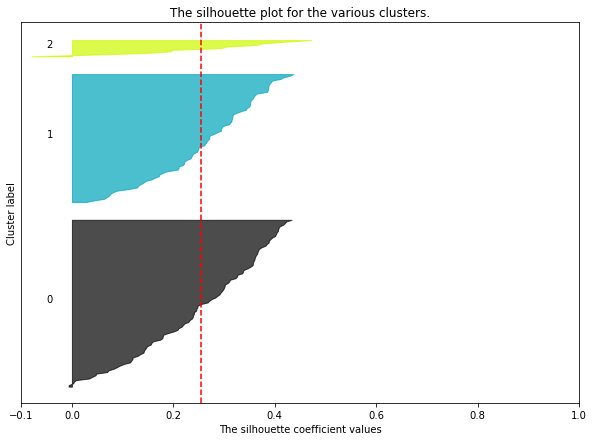

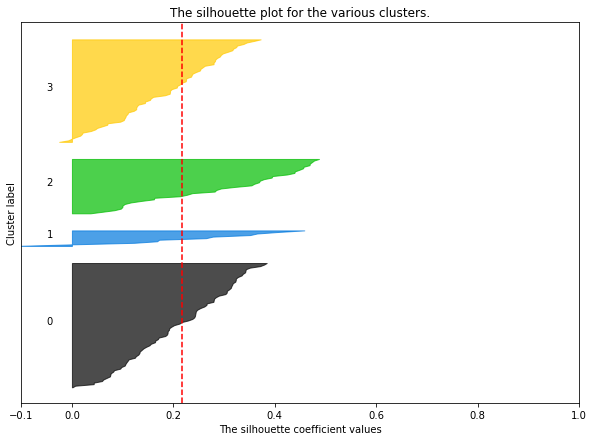

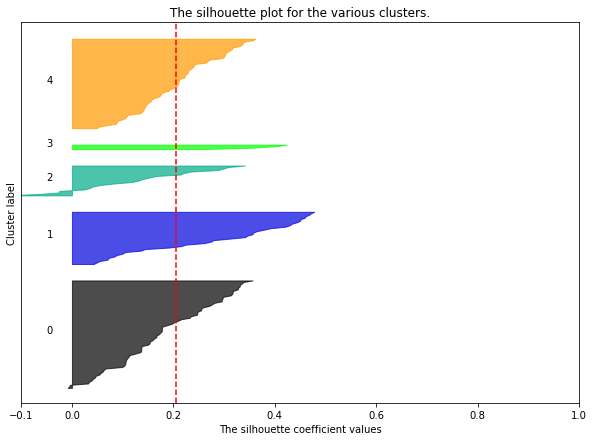

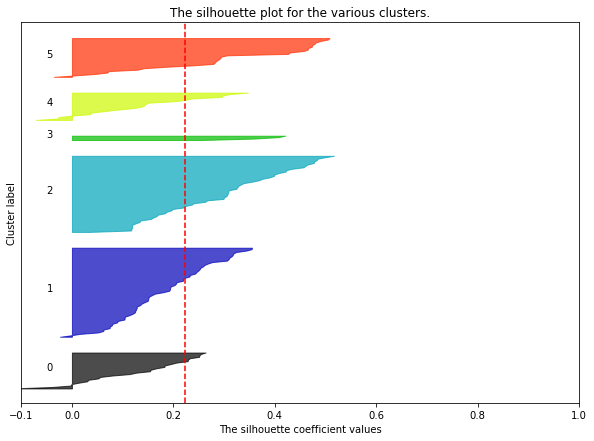

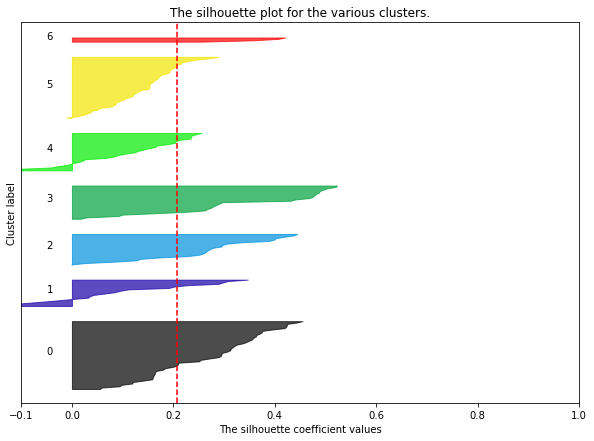

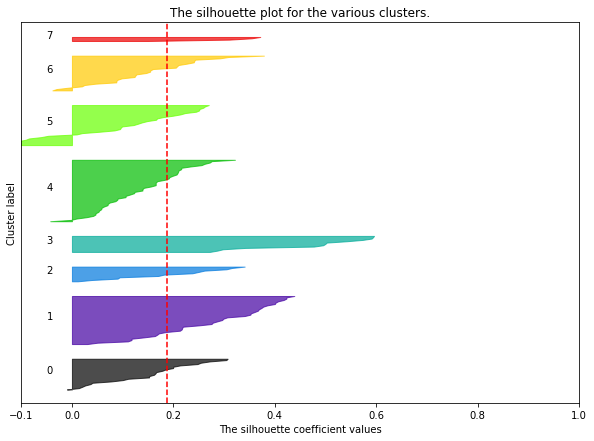

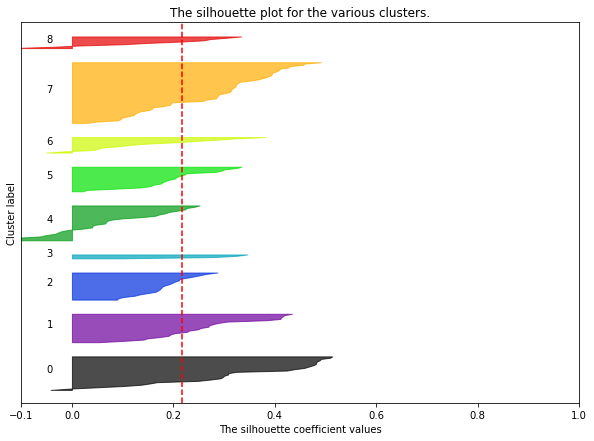

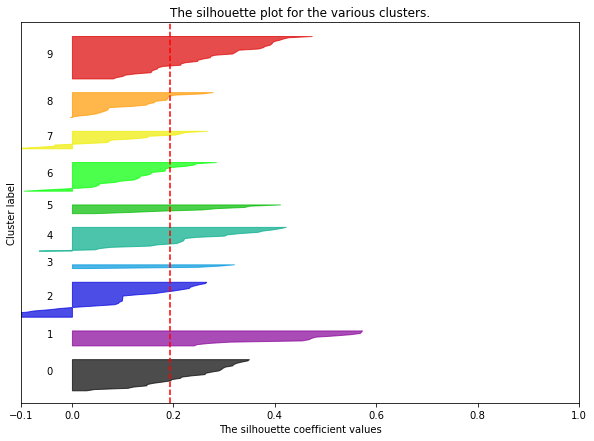

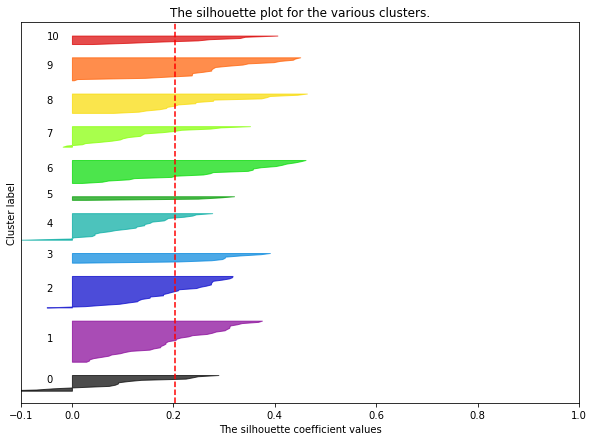

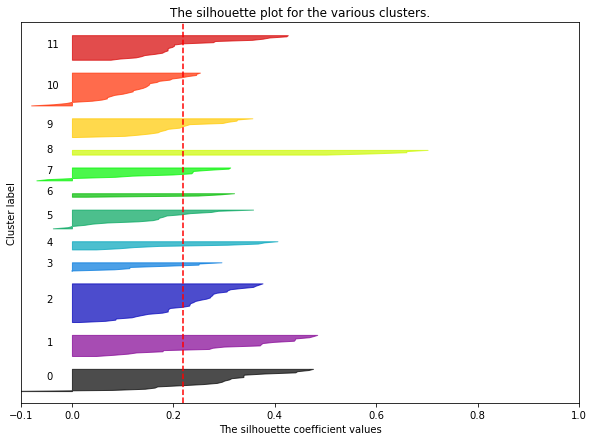

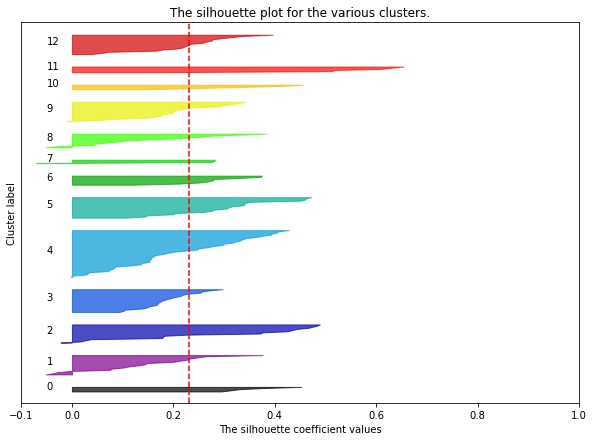

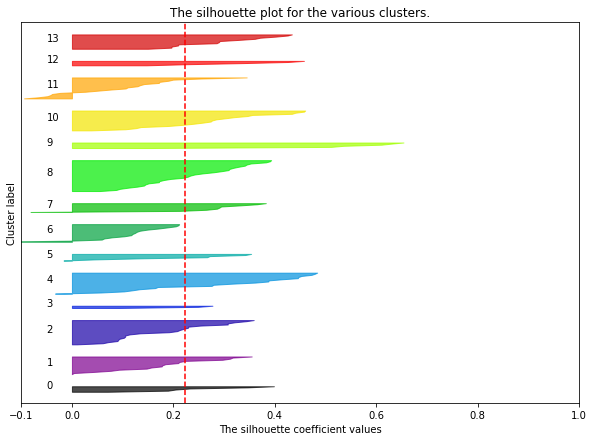

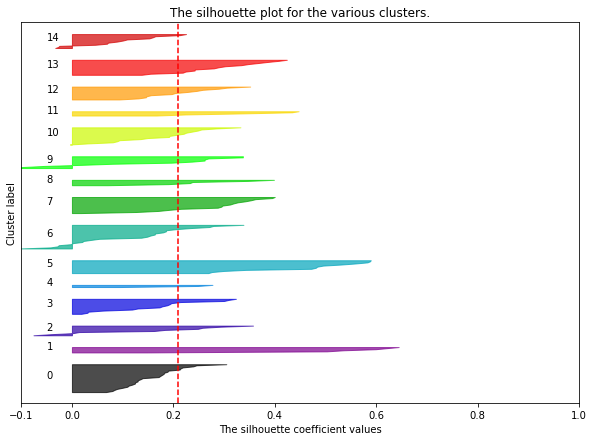

In [5]:
#%% Step 4 K-Means Model on Unsupervised Features and Plots

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from  sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

# List to store cluster and intra cluster distance

clusters = []
inertia_vals = []
all_scores = []

# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(2, 16, 1):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    
    fig.set_size_inches(10, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (k + 1) * 10])
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=10, algorithm="auto")
    model.fit(x)
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    cluster_labels = model.fit_predict(x)
    #print("---------------------------------------")
    #print(clusters[k-2])
    #print("Silhouette score:",silhouette_score(x, clusters[k-2].predict(x)))
    all_scores.append(silhouette_score(x, clusters[k-2].predict(x)))
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, clusters[k-2].predict(x))
    
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
     
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_score(x, clusters[k-2].predict(x)), color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

del inertia_vals, model, ax1, cluster_labels, color, fig, i, ith_cluster_silhouette_values, k
del sample_silhouette_values, size_cluster_i, y_lower, y_upper

In [6]:
#%% Step 5 What is the optimal number of clusters for this dataset for each model?
best_cluster = clusters[all_scores.index(max(all_scores))]
print("The Optimal Number of Clusters is ", best_cluster.n_clusters)

The Optimal Number of Clusters is  2


Silhouetter Score: 0.276


C:\Users\danma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=10))

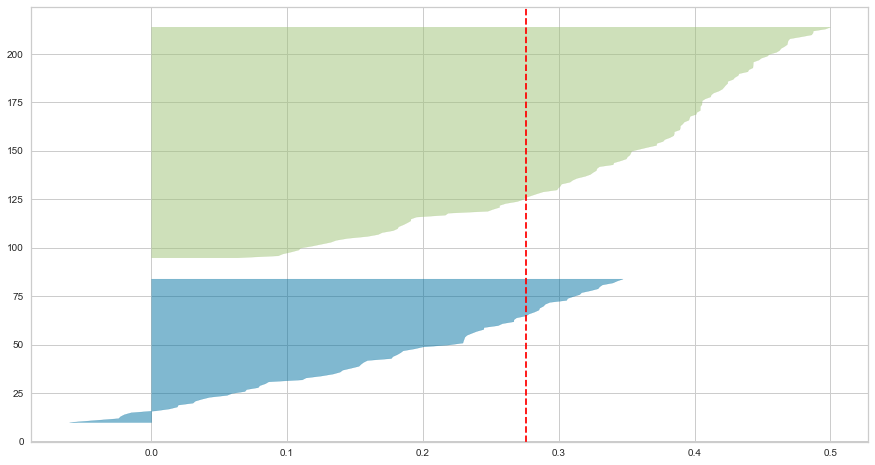

In [7]:
#%%  Learn a final K-means model using the optimal number of clusters.

model = KMeans(n_clusters=best_cluster.n_clusters, random_state=10, algorithm="auto")
model.fit_predict(x)

# Calculate Silhoutte Score
score = silhouette_score(x, model.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(1,1, figsize=(15,8))

visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax)
visualizer.fit(x)